In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model=Sequential([
    Conv2D(16,(3,3),padding='SAME',strides=2, activation='relu',input_shape=(28,28,1)),#기본 stride=1 그리고 기본적으로 제로패딩
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','mae']

)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
____________________________________________________

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

model=Sequential([
    Dense(64, activation='elu',input_shape=(32,)),
    Dense(100, activation='softmax')
])
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy','mae']

)
model.fit(X_train,y_train,epoch=10,batch_size=16)

# X_train:(num_samples,num_feature)
# y_train:(num_samples,num_classes)



model.summary()

In [1]:
'''
cnn신경망 실습

'''
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

fashion_mnist_data=tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)= fashion_mnist_data.load_data()

print(train_images.shape)

train_images=train_images/255.
test_images=test_images/255.
print(train_images.shape,test_images.shape)

model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc,mae]
)

# i=0
# img=train_images[i,:,:]
# plt.imshow(img)
# plt.show()
# print("label: (labels(train_labels{0})".format(i))

labels=["t-shirts",'tr','pull','dress','coat','sandal','shirts','sneakers','bag','ank boot']

model.fit(train_images[...,np.newaxis],train_labels,epochs=20,batch_size=256,verbose=2)
test_loss,test_accuracy,test_mae=model.evaluate(test_images,test_labels)



(60000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


NameError: name 'Sequential' is not defined

In [2]:
'''
mnist dataset으로 cnn신경망 만들어보기

'''
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

mnist_data=tf.keras.datasets.mnist
(train_images, train_labels),(test_images,test_labels)= mnist_data.load_data()

train_images=train_images/255.
test_images=test_images/255.


model=Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
opt=tf.keras.optimizers.Adam(learning_rate=0.005)
acc=tf.keras.metrics.SparseCategoricalAccuracy()
mae=tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=[acc,mae]
)

model.fit(train_images[...,np.newaxis],train_labels,epochs=2,batch_size=256,verbose=2)
test_loss,test_accuracy,test_mae=model.evaluate(test_images,test_labels)


# model_weights = model.weights[0].numpy()
# plt.hist(model_weights.reshape(-1,1))
# plt.xlabel('weight')
# plt.ylabel('count')
# plt.show()

Epoch 1/2
235/235 - 9s - loss: 0.2435 - sparse_categorical_accuracy: 0.9281 - mean_absolute_error: 4.3737 - 9s/epoch - 38ms/step
Epoch 2/2
235/235 - 1s - loss: 0.0738 - sparse_categorical_accuracy: 0.9777 - mean_absolute_error: 4.3737 - 642ms/epoch - 3ms/step
313/313 [==============================] - 1s 2ms/step - loss: 0.0547 - sparse_categorical_accuracy: 0.9825 - mean_absolute_error: 4.3630


number: 0  test_labels: 7
1/1 [==============================] - 0s 196ms/step
model prediction: 7 

number: 1  test_labels: 2
1/1 [==============================] - 0s 17ms/step
model prediction: 2 

number: 2  test_labels: 1
1/1 [==============================] - 0s 16ms/step
model prediction: 1 

number: 3  test_labels: 0
1/1 [==============================] - 0s 18ms/step
model prediction: 0 

number: 4  test_labels: 4
1/1 [==============================] - 0s 17ms/step
model prediction: 4 

number: 5  test_labels: 1
1/1 [==============================] - 0s 21ms/step
model prediction: 1 

number: 6  test_labels: 4
1/1 [==============================] - 0s 17ms/step
model prediction: 4 

number: 7  test_labels: 9
1/1 [==============================] - 0s 19ms/step
model prediction: 9 

number: 8  test_labels: 5
1/1 [==============================] - 0s 17ms/step
model prediction: 5 

number: 9  test_labels: 9
1/1 [==============================] - 0s 18ms/step
model prediction: 9 


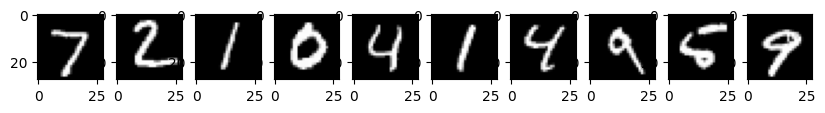

In [3]:
for inx in range(10):
    test_image=test_images[inx]
    print("number: {0}  test_labels: {1}".format(inx,test_labels[inx]))

    prediction=model.predict(test_image[np.newaxis,...,np.newaxis])
    print("model prediction: {0}".format(np.argmax(prediction)),"\n")

plt.figure(figsize=(10,10))
for index in range(10):
    plt.subplot(1,10,index+1),plt.imshow(test_images[index],cmap='gray')
plt.show()

In [ ]:
model.weights